# 04_Analysis Previous Installments Payments Dataset
In this notebook I analyze the installment payments dataset which is described below:
- Repayment history for the previously disbursed credits in Home Credit related to the loans in the sample.

**Analysis Summary**:
After analyzing the installment payments dataset I created a category feature called PAYMENT_GRADE and a historical on-time payment measure column called TIMELY_PERCENT. The PAYMENT_GRADE column puts every installment client into a category based on their on-time historical payment percentage measure by their TIMELY_PERCENT column. Below are the 5 categories for the PAYMENT_GRADE:
- Good: 89% and above
- Par: 83% to 89%
- Sub_Par: 71% to 83%
- Poor: 53% to 71%
- Very_Poor: Less than 53%

In [7]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## 4.1 Import data and overview data

In [8]:
ins = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\installments_payments.csv")
FieldsNames = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\HomeCredit_columns_description.csv")

In [ ]:
# print description of each field in the table
Info = FieldsNames[FieldsNames['Table'] == 'installments_payments.csv'] [['Row','Description']]
for i in Info.values.tolist():
    print (i,"\n", "-"*100)

In [4]:
ins.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [5]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [3]:
num_col = ins.select_dtypes(["float", "integer"]).columns

In [7]:
ins[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,13605401.0,1.903365e+06,536202.905546,1000001.0,1434191.000,1896520.000,2369094.000,2843499.000
SK_ID_CURR,13605401.0,2.784449e+05,102718.310411,100001.0,189639.000,278685.000,367530.000,456255.000
NUM_INSTALMENT_VERSION,13605401.0,8.566373e-01,1.035216,0.0,0.000,1.000,1.000,178.000
NUM_INSTALMENT_NUMBER,13605401.0,1.887090e+01,26.664067,1.0,4.000,8.000,19.000,277.000
DAYS_INSTALMENT,13605401.0,-1.042270e+03,800.946284,-2922.0,-1654.000,-818.000,-361.000,-1.000
DAYS_ENTRY_PAYMENT,13602496.0,-1.051114e+03,800.585883,-4921.0,-1662.000,-827.000,-370.000,-1.000
AMT_INSTALMENT,13605401.0,1.705091e+04,50570.254429,0.0,4226.085,8884.080,16710.210,3771487.845
AMT_PAYMENT,13602496.0,1.723822e+04,54735.783981,0.0,3398.265,8125.515,16108.425,3771487.845


## 4.2 Add On Payment Grade Category
Create a column called PAYMENT_GRADE to put every installment client into a category based on their on-time historical payment percentage.

In [9]:
#add flag to indicate installment received on time and the minimum payment was received
def on_time(x):
    timely = x['DAYS_INSTALMENT'] >= x['DAYS_ENTRY_PAYMENT']
    min_met = x['AMT_PAYMENT'] >= x['AMT_INSTALMENT']
    
    if timely and min_met:
        return 1
    else:
        return 0

ins['TIMELY_FLAG'] = ins.apply(on_time,axis=1)

In [10]:
ins.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TIMELY_FLAG
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,1
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,1
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,1
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,1
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,0


In [11]:
#lets count the number of timely payments
ins['TIMELY_SUM'] = ins.groupby(['SK_ID_CURR'])['TIMELY_FLAG'].transform('sum')

In [12]:
#lets count the number of total installment payments
ins['INSTALLMENT_COUNT'] = ins.groupby(['SK_ID_CURR'])['TIMELY_FLAG'].transform('count')

In [13]:
#flatten dataset to only one row per client
features = ['TIMELY_SUM','INSTALLMENT_COUNT']
ins_final = ins.groupby(['SK_ID_CURR'])[features].first().reset_index()

In [14]:
#calculate percent
ins_final['TIMELY_PERCENT'] = ins_final['TIMELY_SUM'] / ins_final['INSTALLMENT_COUNT']
ins_final['TIMELY_PERCENT'].describe()

count    339587.000000
mean          0.885326
std           0.175132
min           0.000000
25%           0.833333
50%           0.970588
75%           1.000000
max           1.000000
Name: TIMELY_PERCENT, dtype: float64

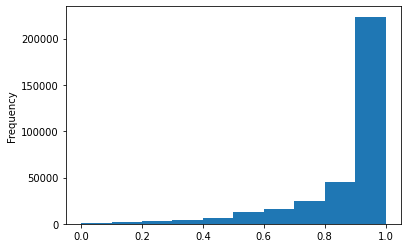

In [10]:
ins_final['TIMELY_PERCENT'].plot.hist()
plt.show()

In [15]:

def payment_cat(x):
    '''Put each id into a category based timely payments rate.'''
    if x >= 0.89:
        return 'Good'
    elif x >= 0.83:
        return 'Par'
    elif x >= 0.71:
        return 'Sub_Par'
    elif x >= 0.53:
        return 'Poor'
    else:
        return 'Very_Poor'

ins_final['INSTLL_PAY_PAYMENT_GRADE'] = ins_final['TIMELY_PERCENT'].apply(payment_cat)

In [12]:
ins_final.head()

,SK_ID_CURR,TIMELY_SUM,INSTALLMENT_COUNT,TIMELY_PERCENT,INSTLL_PAY_PAYMENT_GRADE
0,100001,6,7,0.857143,Par
1,100002,19,19,1.000000,Good
2,100003,25,25,1.000000,Good
3,100004,3,3,1.000000,Good
4,100005,8,9,0.888889,Par


In [13]:
ins_final.groupby(['INSTLL_PAY_PAYMENT_GRADE'])['TIMELY_PERCENT'].describe()

INSTLL_PAY_PAYMENT_GRADE,Good,Par,Poor,Sub_Par,Very_Poor
count,227941.000000,29238.000000,26772.000000,35243.000000,20393.000000
mean,0.981793,0.860818,0.630539,0.773652,0.369680
std,0.031043,0.018063,0.051331,0.035456,0.127776
min,0.890000,0.830000,0.530000,0.710000,0.000000
25%,0.969388,0.846154,0.588235,0.744681,0.294118
50%,1.000000,0.861178,0.636364,0.777778,0.400000
75%,1.000000,0.875000,0.674157,0.804348,0.475410
max,1.000000,0.889908,0.709924,0.829960,0.529915


<AxesSubplot:>

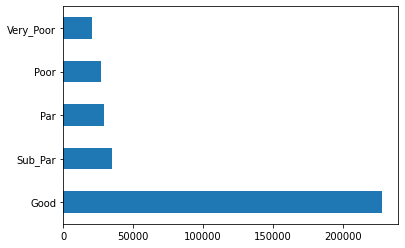

In [16]:
ins_final['INSTLL_PAY_PAYMENT_GRADE'].value_counts().plot.barh()

## 4.3 Save Final Dataset To File

In [17]:
ins_final[['SK_ID_CURR','TIMELY_PERCENT', 'INSTLL_PAY_PAYMENT_GRADE']].to_csv(r'C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_4_installment_payments.csv',index=False)